## Aplicaciones de Machine Learning en Economía 
Primer Semestre 2024

Instituto de Economía
Pontificia Universidad Católica de Chile
# Proyecto Final: [Experiencias de Compra en E-Commerce: Métodos de Machine Learning 
para predecir el nivel de satisfacción de compras en línea]
- Autores:
    - Matilde Cerda Ruiz  [<mgcerdar@uc.cl>]
    - Axel Canales Garcia  [<aocanalesg@uc.cl>]
    
- Fecha: Lunes 1 de julio del 2024

## Descripción del proyecto
Breve descripción de proyecto:
- Contexto área del conocimiento: 
- Pregunta de investigación:  ¿Es posible para las empresas estimar la calificación que un cliente probablemente otorgará en su próxima reseña de pedido antes de que esta sea enviada? 
- Fuente de información principal: Brazilian E-Commerce Public Dataset by Olist 
## Contenido
1. [Pre-procesamiento](#seccion1)
2. [Análisis Exploratorio de Datos (EDA](#seccion2)
3. [Feature Engineering](#seccion3)
4. [Entrenamiento](#seccion4)
5. [Evaluación](#seccion5)

## 1. Pre-procesamiento 
Incluir en esta sección:
- Importación de librerías principales
- Carga del data frame
- Integración con otros sets de datos (si aplica)
- Descripción inicial de las columnas:
    - tipo de datos
    - evaluar presencia de missings y outliers

In [1]:
# Importacion de librerias principales
!pip install gdown >nul 2>&1
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #Comando para que no haya warnings

In [2]:
## Se cargan los archivos csv 
# Lista de nombres de archivos
file_names = ['product_category_name_translation.csv',
              'olist_sellers_dataset.csv',
              'olist_products_dataset.csv',
              'olist_orders_dataset.csv',
              'olist_order_reviews_dataset.csv',
              'olist_order_payments_dataset.csv',
              'olist_order_items_dataset.csv',
              'olist_geolocation_dataset.csv',
              'olist_customers_dataset.csv']

# Lista de IDs de archivos en Google Drive
file_ids = ['1BfYQ4z79RTijJhZCCesQyFmgQsxmLpfF',
            '1o14WF3gQ8OOfpL-gOPYmaebb9mugRj8O',
            '1BTdT9s3I7I9NS8_DyLBzw9rT1Q39nHQd',
            '1hJl-5zHDqhacnyo_9Q-aCR9gqLydTZrC',
            '1KjO6AX0FfealcC8aE9_nkyLbZJmGDnvS',
            '1rKIyBxrKIeLncQ32EusKEWnN5pcEz8MY',
            '1RqhR5o7T_XF8IcnLMljUsi_DQ4Zm4XXK',
            '1GI-xHKTEmT4EJJzVvm1Xfbrz8paf3s3a',
            '1D_cArjIYJA02LQgkTO1_lnwlZj7pCljq']

# Se crea el diccionario donde se guardaran los dataframe
dataframes = {}
for file_name, file_id in zip(file_names, file_ids):
    output = f'{file_name}'
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)
    dataframes[file_name] = pd.read_csv(output)

# Mostrar las primeras filas de cada DataFrame
for file_name, df in dataframes.items():
    print(f'Data from file {file_name}:')
    print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1BfYQ4z79RTijJhZCCesQyFmgQsxmLpfF
To: C:\Users\Axel Canales\product_category_name_translation.csv
100%|██████████| 2.61k/2.61k [00:00<?, ?B/s]
Downloading...
From: https://drive.google.com/uc?id=1o14WF3gQ8OOfpL-gOPYmaebb9mugRj8O
To: C:\Users\Axel Canales\olist_sellers_dataset.csv
100%|██████████| 175k/175k [00:00<00:00, 17.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BTdT9s3I7I9NS8_DyLBzw9rT1Q39nHQd
To: C:\Users\Axel Canales\olist_products_dataset.csv
100%|██████████| 2.38M/2.38M [00:00<00:00, 6.39MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hJl-5zHDqhacnyo_9Q-aCR9gqLydTZrC
To: C:\Users\Axel Canales\olist_orders_dataset.csv
100%|██████████| 17.7M/17.7M [00:01<00:00, 9.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KjO6AX0FfealcC8aE9_nkyLbZJmGDnvS
To: C:\Users\Axel Canales\olist_order_reviews_dataset.csv
100%|██████████| 14.5M/14.5M [00:01<00:00, 9.51MB/s]
Downloading...
From: https://drive.go

Data from file product_category_name_translation.csv:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
Data from file olist_sellers_dataset.csv:
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  bragan

In [3]:
# Crear un nuevo diccionario con los nombres de dataset sin el prefijo olist y sin .csv
dataframes = {name.replace('olist_', '').replace('.csv', ''): df for name, df in dataframes.items()}

## Se eliminan todas aquellas columnas que terminen en zip_code_prefix salvo las del dataset geolocation y seller para disminuir redundancia y uso de memoria
for dataset_name, dataset_df in dataframes.items():
    # Excluir los DataFrames 'olist_geolocation_dataset.csv' y 'olist_sellers_dataset.csv'
    if dataset_name not in ['geolocation_dataset', 'sellers_dataset', 'customers_dataset']:
        # Filtrar las columnas que no terminan en "zip_code_prefix"
        filtered_columns = [col for col in dataset_df.columns if not col.endswith('zip_code_prefix')]
        # Almacenar solo las columnas filtradas en el DataFrame
        dataframes[dataset_name] = dataset_df[filtered_columns]

# Renombrar las columnas 'geolocation_zip_code_prefix' y 'seller_zip_code_prefix' a 'zip_code_prefix' para utilizarlas como key
dataframes['geolocation_dataset'].rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
dataframes['sellers_dataset'].rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [4]:
# Definir la función para combinar datasets
def merge_datasets(dataframes):
    # Combinar orders_dataset y customers_dataset usando customer_id primero por ser tablas principales
    merged = pd.merge(dataframes['customers_dataset'], dataframes['orders_dataset'], on='customer_id', how='left')
    merged = pd.merge(merged, dataframes['order_items_dataset'], on='order_id', how='left')
    merged = pd.merge(merged, dataframes['sellers_dataset'], on='seller_id', how='left')
    merged = pd.merge(merged, dataframes['products_dataset'], on='product_id', how='left')
    merged = pd.merge(merged, dataframes['order_payments_dataset'], on='order_id', how='left')
    merged = pd.merge(merged, dataframes['order_reviews_dataset'], on='order_id', how='left')
    merged = pd.merge(merged, dataframes['product_category_name_translation'], on='product_category_name', how='left')
    merged = pd.merge(merged, dataframes['geolocation_dataset'], on='zip_code_prefix', how='left')
    return merged

# Fusionar los datasets cargados
df = merge_datasets(dataframes)
# Se elimina una columna que tiene descripcion del producto en portugues
df = df.drop(columns=['product_category_name'])
#Se renombra la columna que contiene la categoria de producto en ingles
df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

# Mostrar las primeras filas del dataframe fusionado
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17094341 entries, 0 to 17094340
Data columns (total 43 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_unique_id             object 
 2   customer_zip_code_prefix       int64  
 3   customer_city                  object 
 4   customer_state                 object 
 5   order_id                       object 
 6   order_status                   object 
 7   order_purchase_timestamp       object 
 8   order_approved_at              object 
 9   order_delivered_carrier_date   object 
 10  order_delivered_customer_date  object 
 11  order_estimated_delivery_date  object 
 12  order_item_id                  float64
 13  product_id                     object 
 14  seller_id                      object 
 15  shipping_limit_date            object 
 16  price                          float64
 17  freight_value                  float64
 18  

In [5]:
# Chequear si existen duplicados
print("Observaciones duplicadas antes de ser eliminadas:")
print(df.duplicated().sum())
#Eliminar duplicados
df = df.drop_duplicates()
# Verificar nuevamente si existen duplicados después de la eliminación
print("Observaciones duplicadas después de ser eliminadas:")
print(df.duplicated().sum())

Observaciones duplicadas antes de ser eliminadas:
4208445
Observaciones duplicadas después de ser eliminadas:
0


In [6]:
# Contar los valores NaN en cada columna del DataFrame
print("Observaciones nulas antes de ser eliminadas:")
print(df.isna().sum())
#Eliminar los NaN
df.dropna(inplace=True)
print("Observaciones nulas despues de ser eliminadas:")
print(df.isna().sum())

Observaciones nulas antes de ser eliminadas:
customer_id                             0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_id                                0
order_status                            0
order_purchase_timestamp                0
order_approved_at                    1866
order_delivered_carrier_date       128467
order_delivered_customer_date      271026
order_estimated_delivery_date           0
order_item_id                         833
product_id                            833
seller_id                             833
shipping_limit_date                   833
price                                 833
freight_value                         833
zip_code_prefix                       833
seller_city                           833
seller_state                          833
product_name_lenght                185163
product_description_lenght     

In [7]:
# Convertir las columnas de fecha al formato datetime
date_columns = [
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date']

if df is not None and all(col in df.columns for col in date_columns):
    for col in date_columns:
        if df[col].notna().any():  # Verifica si hay datos no nulos en la columna
            df[col] = pd.to_datetime(df[col], errors='coerce')

In [8]:
## Creacion de la variable dependiente 
df['satisfaction'] = df['review_score'].apply(lambda x: 1 if x >= 4 else 0)

In [9]:
# Crear una nueva columna con la cantidad de caracteres en 'review_comment_message'
df['review_message_length'] = df['review_comment_message'].str.len().fillna(0).astype(int)

# Crear una nueva columna con el valor 1 si dejaron reseña, de lo contrario 0
df['message_exists'] = np.where(df['review_comment_message'].notna() & (df['review_comment_message'] != ''), 1, 0)

# Calcular el número de días en retraso de una entrega
df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Definir una variable 'late_delivery'
df['late_delivery'] = np.where(df['delivery_delay_days'] > 0, 1, 0)

# Calcular el número de días que el vendedor retuvo la orden desde que se generó la compra
df['seller_days'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.days

# Calcular el número de días que el equipo de entrega tardó en entregar el paquete desde que lo recibió del vendedor
df['logistic_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

# Calcular el volumen del producto en m3 si las columnas existen
df['product_volume_m3'] = (df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']) / 1000000


In [11]:
# Crear una nueva columna que indique si el cliente y el vendedor tienen el mismo código postal
df['same_postal'] = (df['customer_zip_code_prefix'] == df['zip_code_prefix']).astype(int)

# Calcular el envío total por orden y fusionar en el dataframe df
max_order_item_id = df.groupby('order_id')['order_item_id'].transform('max')
df['Freight_value_by_order'] = df['freight_value'] * max_order_item_id
total_freight_value_by_order = df.groupby('order_id')['Freight_value_by_order'].sum().reset_index()
df = df.merge(total_freight_value_by_order, on='order_id', suffixes=('', '_by_order'))

# Calcular el pago total por orden y fusionar en el dataframe df
df['Total_product_value_by_order'] = df['price'] * max_order_item_id
total_product_value_by_order = df.groupby('order_id')['Total_product_value_by_order'].sum().reset_index()
df = df.merge(total_product_value_by_order, on='order_id', suffixes=('', '_by_order'))

# Calcular el monto total pagado por orden
df['total_amount_paid_per_order'] = df['Freight_value_by_order'] + df['Total_product_value_by_order']

In [12]:
# Eliminar variables que ya no necesitaremos
df.drop(columns=['product_length_cm', 'product_height_cm', 'product_width_cm','review_id', 'review_creation_date', 'review_answer_timestamp', 'review_comment_title', 'order_approved_at'], inplace=True)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201285 entries, 0 to 1201284
Data columns (total 51 columns):
 #   Column                                 Non-Null Count    Dtype         
---  ------                                 --------------    -----         
 0   customer_id                            1201285 non-null  object        
 1   customer_unique_id                     1201285 non-null  object        
 2   customer_zip_code_prefix               1201285 non-null  int64         
 3   customer_city                          1201285 non-null  object        
 4   customer_state                         1201285 non-null  object        
 5   order_id                               1201285 non-null  object        
 6   order_status                           1201285 non-null  object        
 7   order_purchase_timestamp               1201285 non-null  datetime64[ns]
 8   order_delivered_carrier_date           1201285 non-null  datetime64[ns]
 9   order_delivered_customer_date      

## 2. Análisis Exploratorio de Datos <a name="seccion2"></a>
Incluir en esta sección:
- Análisis descriptivo de cada atributo y la variable objetivo
    - Distribución variables contínuas
    - Conteo de presencia de cada estado en variables categóricas
    - Evaluar potencial predictivo de atributos sobre target:
        - Matriz de correlación
        - Distribuciones por clase
- Decisiones de imputación de missings y depuración de outliers

In [ ]:
## Porcentaje de clientes que realizaron una recompra

# Contar la cantidad de compras por cada cliente único para cada vendedor
seller_customer_counts = df.groupby(['seller_id', 'customer_unique_id']).size()

# Convertir el resultado a un DataFrame
seller_customer_counts_df = seller_customer_counts.reset_index(name='purchase_count')

# Filtrar clientes que realizaron más de una compra con el mismo vendedor
recompradores = seller_customer_counts_df[seller_customer_counts_df['purchase_count'] > 1]

# Identificar cuántos vendedores tuvieron al menos un cliente que realizó más de una compra
sellers_with_recompradores = recompradores['seller_id'].nunique()

# Calcular el total de vendedores únicos
total_sellers = df['seller_id'].nunique()

# Calcular el porcentaje de vendedores con clientes que realizaron una recompra
porcentaje_sellers_recompradores = (sellers_with_recompradores / total_sellers) * 100

print(f"El porcentaje de vendedores que tuvieron clientes que realizaron una recompra es: {porcentaje_sellers_recompradores:.2f}%")

# Calcular el número promedio de ítems por orden
promedio_items_por_orden = df.groupby('order_id')['order_item_id'].count().mean()

print(f"El número promedio de ítems por orden es: {promedio_items_por_orden:.2f}")

### Estadísticos descriptivos

In [37]:
num_attributes = df[['payment_sequential', 'payment_installments', 'payment_value', 'price', 'freight_value', 'product_name_lenght', 
                       'product_description_lenght', 'product_photos_qty', 'product_weight_g','satisfaction', 'review_message_length', 'message_exists', 'delivery_delay_days', 'late_delivery', 'seller_days', 'logistic_days', 'product_volume_m3', 'same_postal', 'Freight_value_by_order', 'Freight_value_by_order_by_order', 'Total_product_value_by_order']]

cat_attributes = df[['order_status', 'order_id', 'order_item_id', 'order_purchase_timestamp', 'order_delivered_customer_date','order_estimated_delivery_date', 
                       'payment_type', 'product_category_name', 'customer_state', 'seller_state', 'review_score']]

#### Numerical atributes

In [38]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,1201285.0,1.059693,0.428245,1.000000,1.00000,1.00000,1.0000,12.000
payment_installments,1201285.0,3.138016,2.851080,1.000000,1.00000,2.00000,4.0000,20.000
payment_value,1201285.0,194.085640,265.668419,0.050000,69.44000,123.61000,210.8000,7274.880
price,1201285.0,130.402770,203.206054,0.850000,43.99000,79.90000,139.0000,4590.000
freight_value,1201285.0,22.050552,18.163806,0.000000,13.44000,18.30000,23.3500,375.280
product_name_lenght,1201285.0,49.463001,9.758845,8.000000,43.00000,53.00000,57.0000,64.000
product_description_lenght,1201285.0,772.201164,656.778376,4.000000,339.00000,582.00000,971.0000,3985.000
product_photos_qty,1201285.0,2.030700,1.551402,1.000000,1.00000,1.00000,2.0000,17.000
product_weight_g,1201285.0,2089.510354,3740.529709,0.000000,300.00000,700.00000,1700.0000,30000.000
satisfaction,1201285.0,0.685094,0.464479,0.000000,0.00000,1.00000,1.0000,1.000


#### Categorical variables

In [29]:
cat_summary = cat_attributes.astype('category').describe().T
cat_summary 

,count,unique,top,freq
order_status,1201285,1,delivered,1201285
order_id,1201285,9419,637617b3ffe9e2f7a2411243829226d0,2604
order_item_id,1201285.0,13.0,1.0,1017558.0
order_purchase_timestamp,1201285,9398,2018-04-17 21:08:59,2604
order_delivered_customer_date,1201285,9385,2018-05-09 17:48:56,2604
order_estimated_delivery_date,1201285,153,2018-05-29 00:00:00,24338
payment_type,1201285,4,credit_card,913681
product_category_name,1201285,66,bed_bath_table,208482
customer_state,1201285,27,SP,532702
seller_state,1201285,18,SP,863652


### Variables categóricas

In [17]:
cat_attributes = df[['order_status', 'customer_state', 'seller_state', 'payment_type', 'product_category_name', 'late_delivery', 'review_score']]


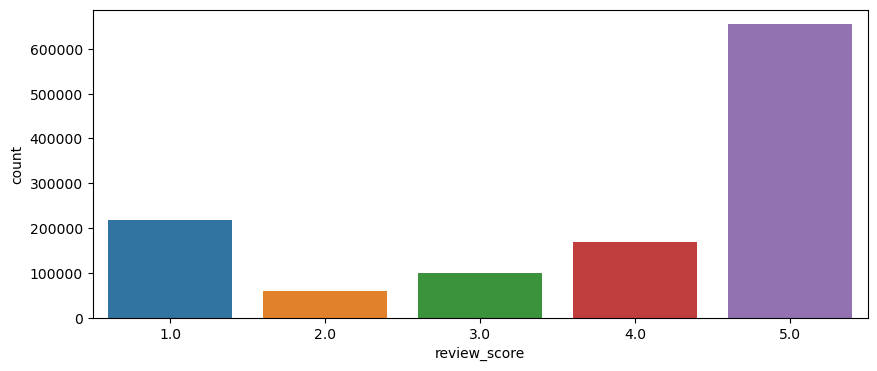

In [14]:
## Review score
plt.figure(figsize=(10, 4))
sns.countplot(x='review_score', data=df);

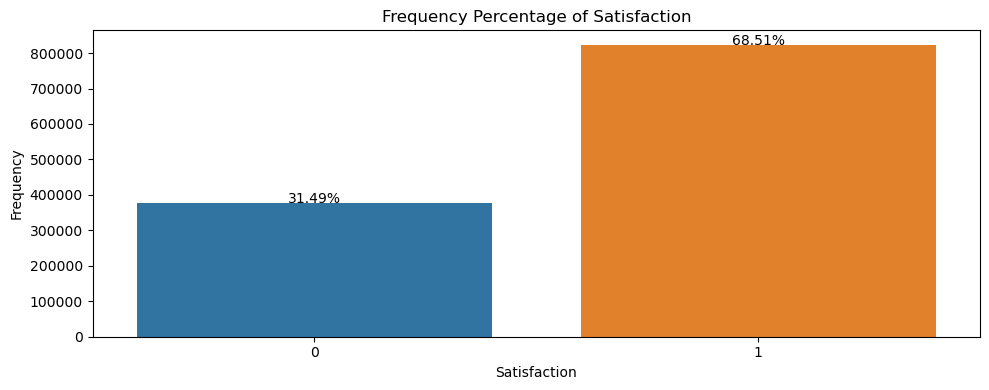

In [36]:
# Calcular los porcentajes
total = len(df)  # Total de filas en el DataFrame
counts = df['satisfaction'].value_counts()  # Conteo de cada categoría de satisfacción
percentages = (counts / total) * 100  # Calcular los porcentajes

# Crear el gráfico
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='satisfaction', data=df)

# Mostrar porcentajes sobre las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5, f'{height / total * 100:.2f}%', ha="center", fontsize=10)

# Configuraciones adicionales
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Frequency Percentage of Satisfaction')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

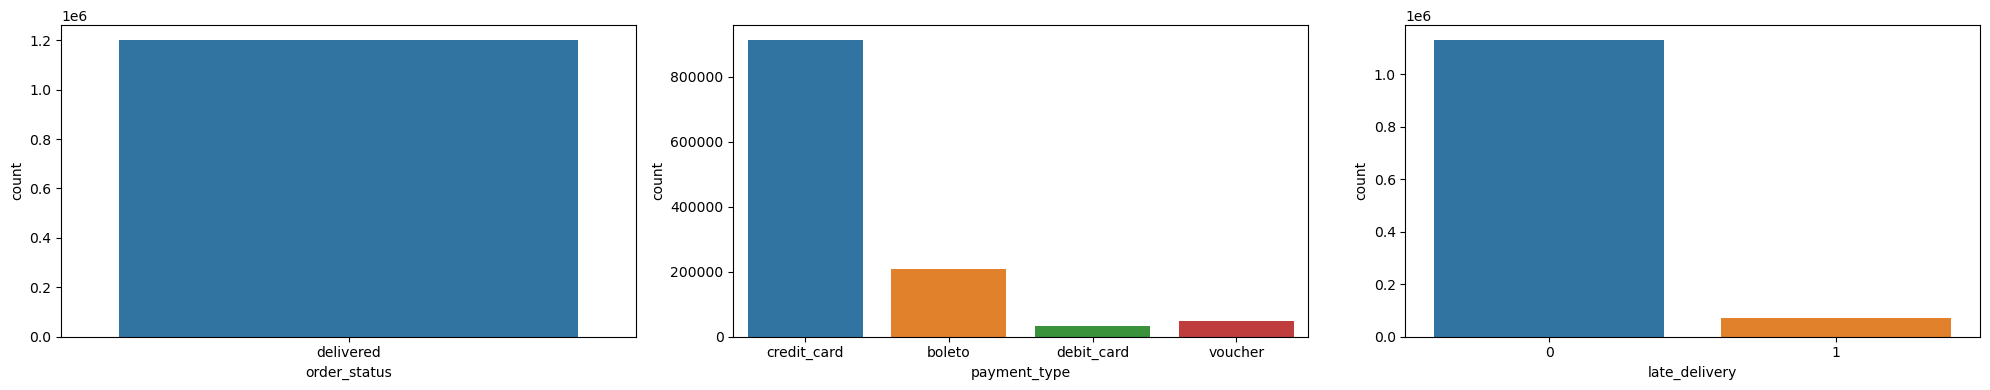

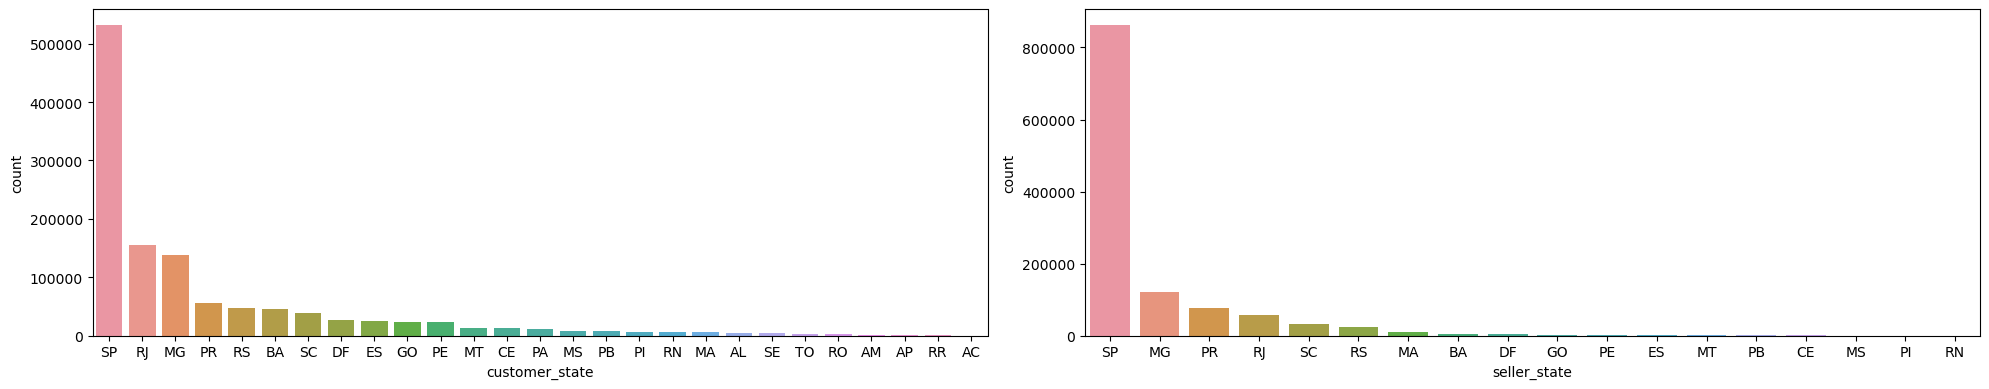

In [19]:
cols = 3
rows = 1 
num_cols = cat_attributes[['order_status', 'payment_type', 'late_delivery']]

fig = plt.figure(figsize= (20, 4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.countplot(x=cat_attributes[col], ax=ax)
    
fig.tight_layout()       
plt.show()

cols = 2
rows = 1 
num_cols = cat_attributes[['customer_state', 'seller_state']]

fig = plt.figure(figsize= (20, 4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.barplot(x=cat_attributes[col].value_counts().index,
                y=cat_attributes[col].value_counts(), ax=ax)
    
fig.tight_layout()       
plt.show() 

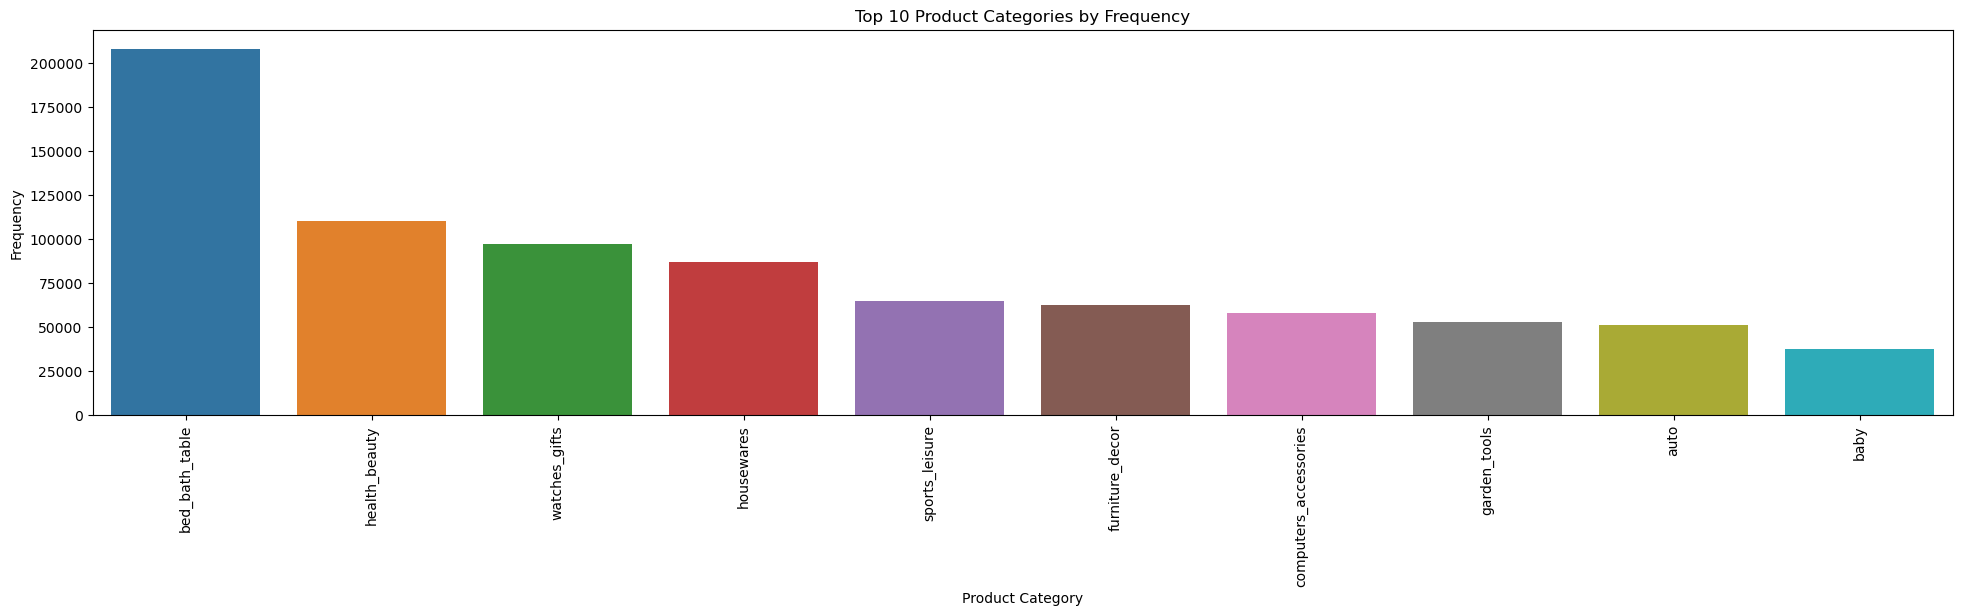

In [20]:
# Contar la frecuencia de cada categoría
category_counts = cat_attributes['product_category_name'].value_counts()

# Filtrar el top 10 en frecuencia
top_10_categories = category_counts.nlargest(10)

# Crear el gráfico
plt.figure(figsize=(24, 5))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xticks(rotation=90)
plt.title('Top 10 Product Categories by Frequency')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='payment_type', ylabel='payment_value'>

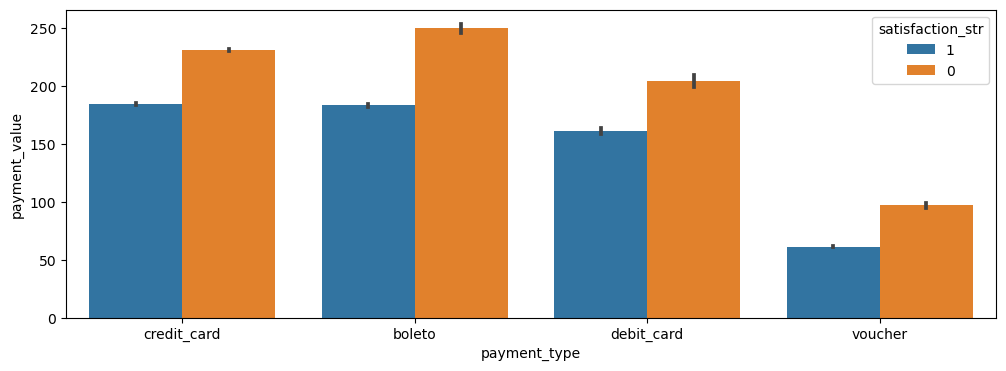

In [30]:
# Convertir 'satisfaction' a tipo string
df['satisfaction_str'] = df['satisfaction'].astype(str)

# Crear el gráfico
plt.figure(figsize=(12, 4))
sns.barplot(x='payment_type', y='payment_value', hue='satisfaction_str', data=df)

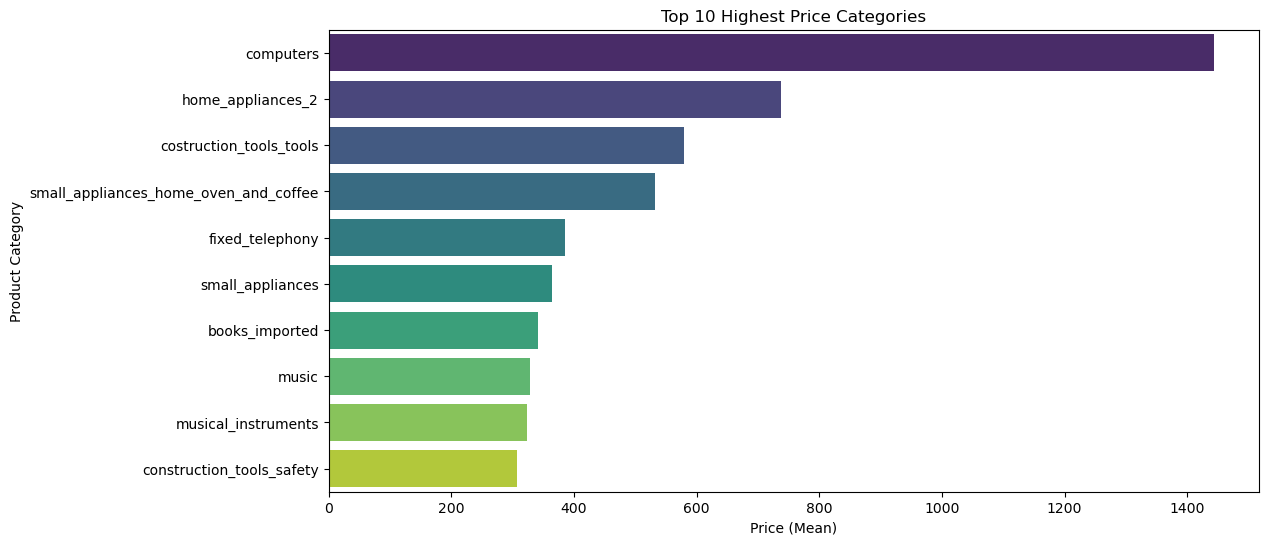

In [22]:
# Obtener las top 10 categorías con el precio promedio más alto
aux = df[['product_category_name', 'price']].groupby('product_category_name').mean().sort_values('price', ascending=False).reset_index()[:10]

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(y='product_category_name', x='price', data=aux, palette='viridis')

# Agregar título y etiquetas de ejes
plt.title('Top 10 Highest Price Categories')
plt.xlabel('Price (Mean)')
plt.ylabel('Product Category')

plt.show()

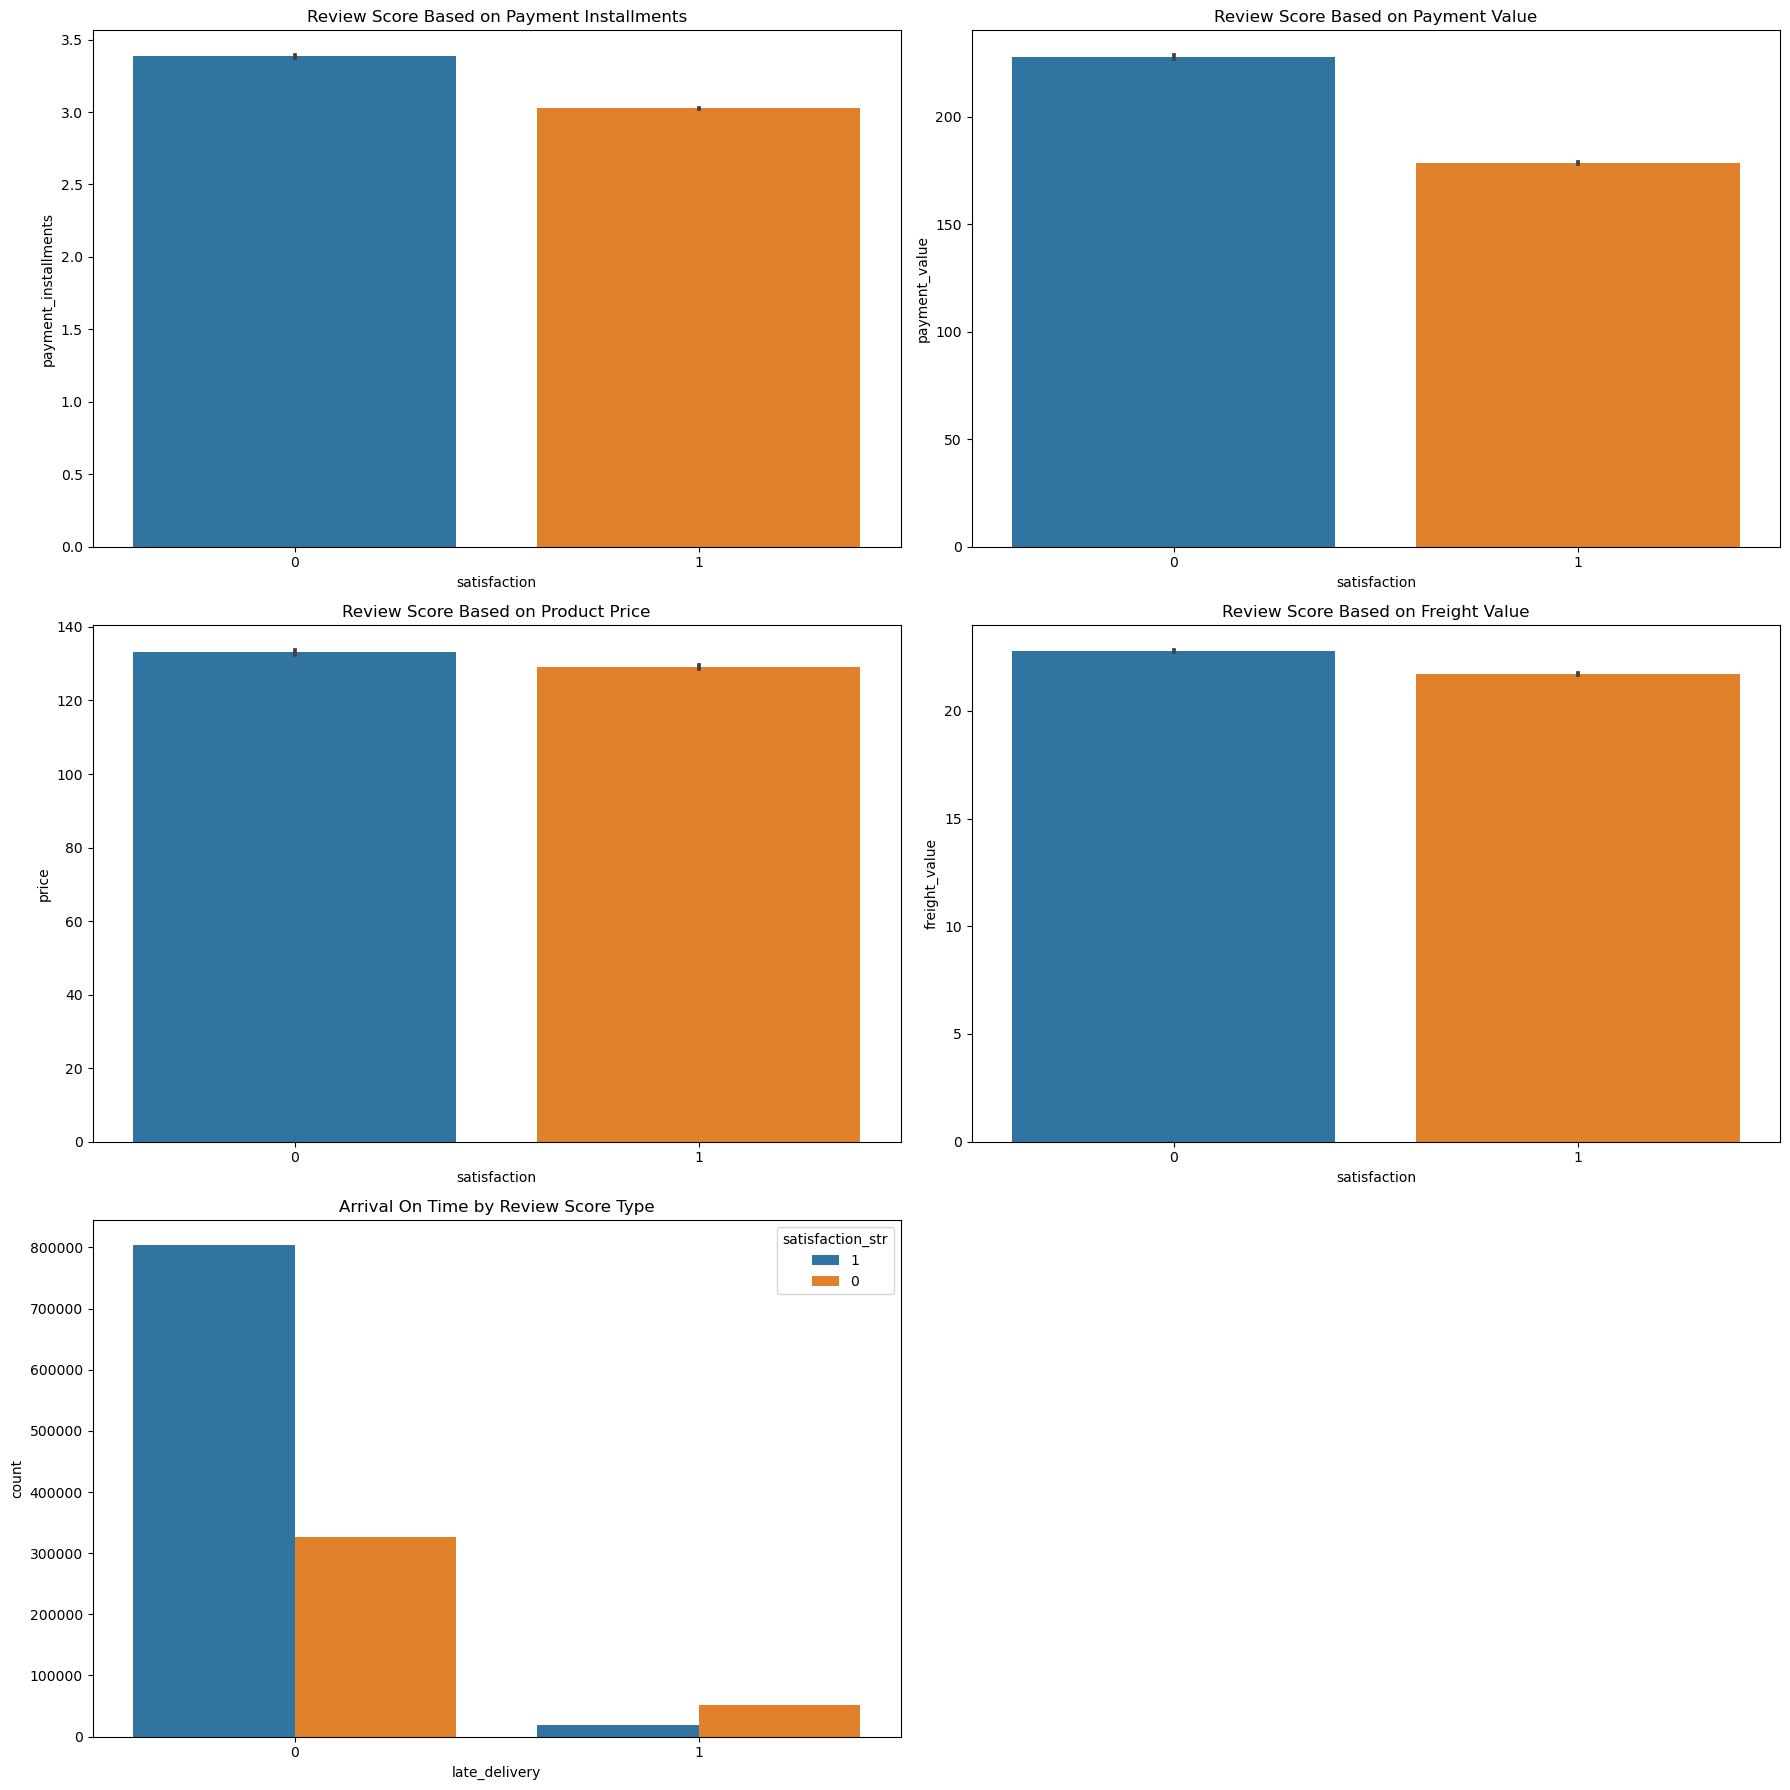

In [35]:

# Crear una figura y ejes utilizando subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# 1 Review score based on payment installments
sns.barplot(y='payment_installments', x='satisfaction', ax=axes[0, 0], data=df)
axes[0, 0].set_title('Review Score Based on Payment Installments')

# 2 Review score based on payment value
sns.barplot(x='satisfaction', y='payment_value', ax=axes[0, 1], data=df)
axes[0, 1].set_title('Review Score Based on Payment Value')

# 3 Review score based on product price
sns.barplot(x='satisfaction', y='price', ax=axes[1, 0], data=df)
axes[1, 0].set_title('Review Score Based on Product Price')

# 4 Review score based on freight value
sns.barplot(x='satisfaction', y='freight_value', ax=axes[1, 1], data=df)
axes[1, 1].set_title('Review Score Based on Freight Value')

# 5 The number of orders that arrived on time or not by review score type
sns.countplot(x='late_delivery', hue='satisfaction_str', ax=axes[2, 0], data=df)
axes[2, 0].set_title('Arrival On Time by Review Score Type')

# Eliminar el espacio vacío del último gráfico en la última celda
fig.delaxes(axes[2, 1])

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## 3. Feature Engineering <a name="seccion3"></a>
Incluir en esta sección:
- Transformaciones necesarias tanto de atributos como target para su ingesta por parte de algoritmos ML:
    - Estandarización y escalado
    - Bucketization
    - One-hot encoding
    - Técnicas de reducción de dimensionalidadoutliers

In [ ]:
# One - hot encoding
df_dummies = pd.get_dummies(df, columns=[
    'payment_type', 
    'seller_city', 
    'seller_state', 
    'product_category_name', 
    'customer_city', 
    'customer_state'
])

## 4. Entrenamiento <a name="seccion4"></a>
Incluir en esta sección:
- Train/test split
- Balanceo de clases (si aplica)
- Definición de la(s) métrica(s) de perfomance que se utilizará(n)
- Grid search
- Entrenamiento de modelostliers

## Multilayer Perceptron

### Data preparation

#### Rescaling

#### Encoding 

#### Separate Target

### Model

## 5. Evaluación <a name="seccion5"></a>
Incluir en esta sección:
- Métricas de performance de los mejores modelos encontrados a partir del grid search
- Matriz de confusión
- Feature importancetliers